<a href="https://colab.research.google.com/github/varshil009/Data-Visualization/blob/main/Copy_of_Data_Visualization_with_Matplotlib_%26_Seaborn_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎉 Hi there! Welcome to today's assignment on Data Visualization with Matplotlib and Seaborn in Python!

Are you ready to put your skills to the test? Let's dive right in! 💪📚

In this assignment, you will be working with Data Visualization with Matplotlib and Seaborn in Python . Don't worry if you're feeling a bit unsure - you got this! 🤞

Good luck! 🍀🚀

#### All the datasets required for this assignment can be found here: https://drive.google.com/drive/folders/1e9JX6rBQyQM-dqWHgGuOicydb2rfpmM6?usp=sharing

#### You can download the data and start working with the assignment.

## **Activity 1:**

### **Netflix Movies and TV Shows:**

The dataset contains information about movies and TV shows available on Netflix as of 2021. Your task is to perform the following actions based on the data:

1. Identify missing values: Check if there are any missing values in the dataset and decide how to handle them. For example, if the "director" column has missing values, we can either delete those rows or fill in the missing values with "unknown".

2. Data Cleaning: Clean the dataset to remove any duplicates, inconsistencies or irrelevant columns. For example, we can remove the "show_id" and "description" columns as they may not be relevant for our analysis.

3. Data Exploration: Use Matplotlib to create visualizations that explore the data in meaningful ways. For example, we can create a bar chart to show the number of movies vs TV shows available on Netflix, or a line chart to show the trend in the number of new titles added each year.

4. Analyze Genres: Analyze the genres of movies and TV shows available on Netflix using bar charts or pie charts. For example, we can create a bar chart to show the top 10 most popular genres on Netflix.

5. Analyze Ratings: Analyze the ratings of movies and TV shows available on Netflix using histograms or box plots. For example, we can create a histogram to show the distribution of ratings on Netflix.

6. Insights and Conclusions: Based on the visualizations created, draw insights and conclusions about the dataset. For example, we may find that Netflix has a larger selection of TV shows than movies, or that the most popular genres on Netflix are drama and comedy.

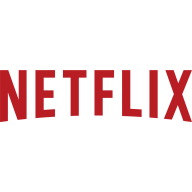

In [ ]:
# Write your code here
import pandas as pd
df = pd.read_csv(r'/content/netflix_titles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# we dont need show_id or description in our analysis
df.drop(['show_id', 'description'], axis = 1, inplace = True)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
# filling empty cells
df.fillna('Unknown', inplace = True)

<ipython-input-5-6c0e5adc1dc1>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


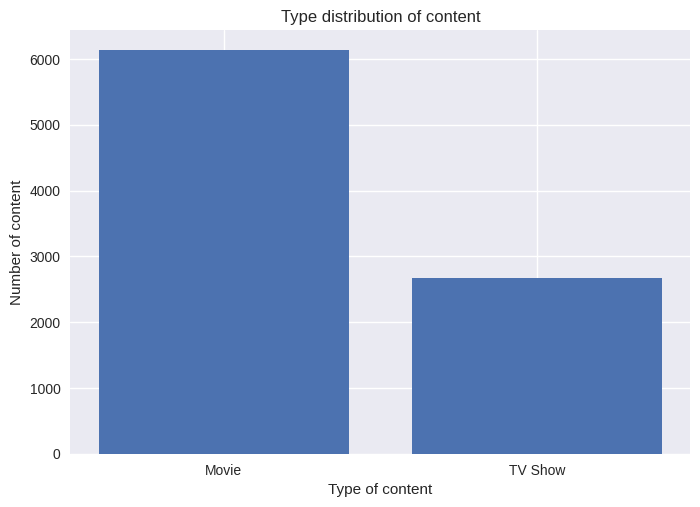

In [ ]:
df1 = df.groupby('type')['title'].count().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
plt.bar(df1['type'], df1['title'])
plt.xlabel('Type of content')
plt.ylabel('Number of content')
plt.title('Type distribution of content')
plt.show()

   year  num
0  1925    1
1  1942    2
2  1943    3
3  1944    3
4  1945    4


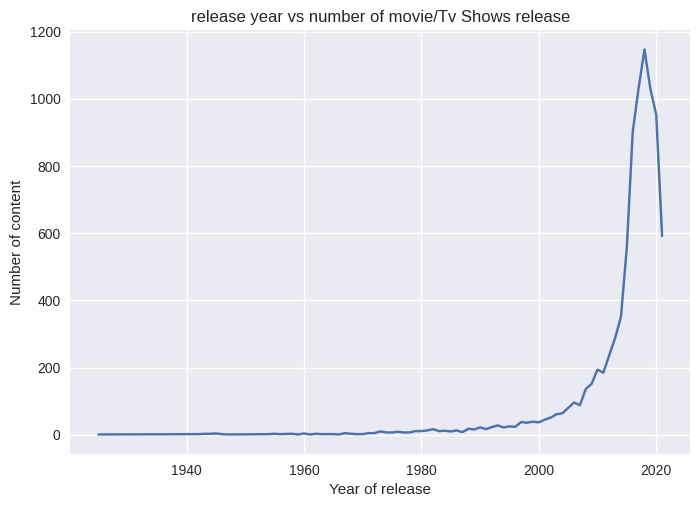

In [ ]:
df2 = df.groupby('release_year')['title'].count().reset_index()
df2.columns = ['year', 'num']
print(df2.head())
plt.plot(df2['year'], df2['num'])
plt.xlabel('Year of release')
plt.ylabel('Number of content')
plt.title('release year vs number of movie/Tv Shows release')
plt.show()

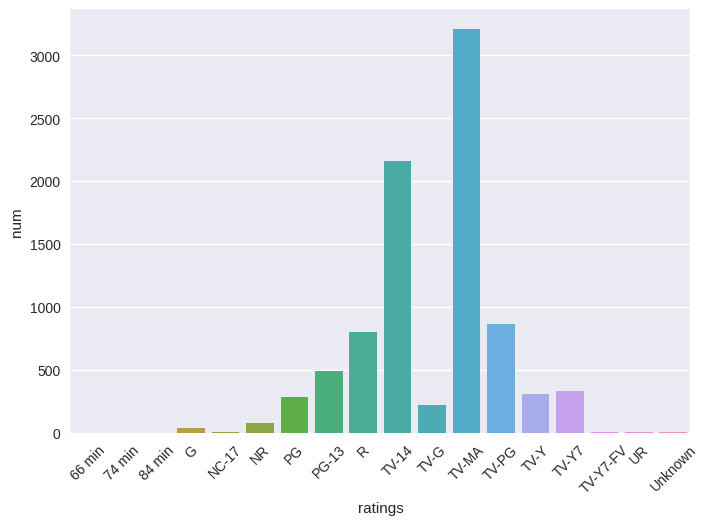

In [ ]:
df3 = df.groupby('rating')['title'].count().reset_index()
df3.columns = ['ratings', 'num']
import seaborn as sns
sns.barplot(data = df3, x = 'ratings', y = 'num')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# we dont have genre columns but info about genre is in listed in column.
import re
def genre(x):
  if re.search('crime', x.lower()):
    return 'crime'
  elif  re.search('comedies', x.lower()):
    return 'comedy'
  elif  re.search('thriller', x.lower()):
    return 'thriller'
  elif  re.search('adventure', x.lower()):
    return 'adventure'
  elif  re.search('horror', x.lower()):
    return 'horror'
  elif  re.search('sci-fi', x.lower()):
    return 'sci-fi'
  elif  re.search('kids', x.lower()):
    return 'kids'
  elif  re.search('romantic', x.lower()):
    return 'romantic'
  elif  re.search('reality', x.lower()):
    return 'reality show'
  elif  re.search('anime', x.lower()):
    return 'anime'
  elif  re.search('mysteries', x.lower()):
    return 'suspense'
  elif  re.search('drama', x.lower()):
    return 'drama'
  elif  re.search('doc', x.lower()):
    return 'Documentary'

df['genre'] = df['listed_in'].apply(genre)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,genre
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,Documentary
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",suspense
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",crime
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",reality show
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",comedy


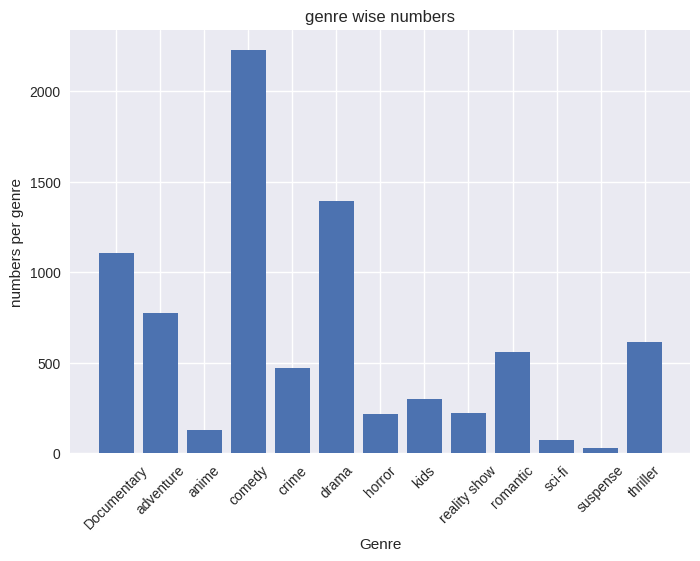

In [ ]:
df4 = df.groupby('genre')['title'].count().reset_index()
df4.columns = ['genre', 'num']

plt.bar(df4.genre, df4.num)
plt.xlabel('Genre')
plt.ylabel('numbers per genre')
plt.title('genre wise numbers')
plt.xticks(rotation = 45)
plt.show()

# ***CONCLUSION***
**Insights from data are below.**
1.  Netfix have more than 6000 movies & around 2700 TV shows. Netflix has a larger selection of movies than TV shows.
2. Netflix have highest number of movies or TV shows released in 2019-2022 time. Movie released in other time lines are less in number
3. Netflix has maximum content for mature audiences(TV-MA rating)
4. Comedy TV shows / movies are maximum in numbers, drama is second & 3rd max is documentaries

## **Activity 2:**

### **US Accidents:**

For this activity, we will be using the "US Accidents" dataset. The dataset contains information about traffic accidents in the United States from 2016 to 2020.

👉 Instructions:
1. Load the dataset into a pandas DataFrame and check for missing values.

2. Identify the top 10 states with the highest number of accidents and create a bar chart using matplotlib to visualize the data.

3. Create a scatter plot of the longitude and latitude columns to show the location of accidents.

4. Identify the top 10 cities with the highest number of accidents and create a horizontal bar chart using matplotlib to visualize the data.

5. Create a pie chart to show the distribution of accidents by severity (use the 'Severity' column).

6. Create a line chart to show the trend of accidents over time (use the 'Start_Time' column).

7. Identify any outliers or inconsistencies in the data and decide how to handle them.

Note:
You may need to clean the data before visualizing it, as it contains missing values and inconsistent formats. Some of the columns may also need to be converted to the appropriate data types before they can be visualized.

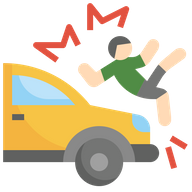

In [ ]:
# Write your code here
import pandas as pd
df = pd.read_csv(r'/content/US_Accidents_March23_SAMPLE.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     500 non-null    object 
 1   Source                 500 non-null    object 
 2   Severity               500 non-null    int64  
 3   Start_Time             500 non-null    object 
 4   End_Time               500 non-null    object 
 5   Start_Lat              500 non-null    float64
 6   Start_Lng              500 non-null    float64
 7   End_Lat                0 non-null      float64
 8   End_Lng                0 non-null      float64
 9   Distance(mi)           500 non-null    float64
 10  Description            500 non-null    object 
 11  Street                 500 non-null    object 
 12  City                   500 non-null    object 
 13  County                 500 non-null    object 
 14  State                  500 non-null    object 
 15  Zipcod

In [ ]:
# droppping empty cols
df.drop(['End_Lat', 'End_Lng'], axis = 1, inplace = True)

In [ ]:
# 1 value in weather conition is missing
df1 = df.groupby('Weather_Condition')['ID'].count()
df1
# Overcast is highest repeating weather condition

Weather_Condition
Clear                      72
Cloudy                      1
Drizzle                     1
Fog                         1
Haze                       17
Heavy Rain                  3
Light Drizzle               1
Light Freezing Drizzle     10
Light Freezing Rain         1
Light Rain                 20
Light Snow                104
Mostly Cloudy              56
Overcast                  150
Partly Cloudy               9
Rain                       19
Scattered Clouds           31
Shallow Fog                 1
Snow                        2
Name: ID, dtype: int64

In [ ]:
# searching for empty row for weather condtion col
#df2 = df['Weather_Condition'].isnull().any().index()
null_indexes = df[df['Weather_Condition'].isnull()].index
null_indexes

Int64Index([439], dtype='int64')

In [ ]:
df.iloc[439, :]
# from below the temp was 48.2 F which is 9 Celcius at 5 : 23 afternoon

ID                                                            A-440
Source                                                      Source2
Severity                                                          2
Start_Time                                      2016-03-01 17:23:06
End_Time                                        2016-03-01 18:23:06
Start_Lat                                                 40.200333
Start_Lng                                                -83.027435
Distance(mi)                                                    0.0
Description              Accident on Pullman Dr at Lewis Center Rd.
Street                                              Lewis Center Rd
City                                                   Lewis Center
County                                                     Delaware
State                                                            OH
Zipcode                                                  43035-9047
Country                                         

In [ ]:
# we can search for same patterns using above data to put weather condition value
import numpy as np
df3 = df[np.logical_and(df['Temperature(F)'] > 45, df['Humidity(%)'] > 90, df['Pressure(in)'] > 28)]
df3.iloc[:, :28]

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity
363,A-364,Source2,2,2016-02-24 07:18:41,2016-02-24 08:03:41,38.581139,-82.004562,0.01,Accident on US-35 US Highway 35 Northbound at ...,US Highway 35,...,49.0,45.0,100.0,28.62,10.0,E,10.0,0.00,Cloudy,False
384,A-385,Source2,2,2016-02-24 11:25:37,2016-02-24 11:55:37,39.753105,-84.151581,0.01,Accident on Linden Ave at Xenia Ave.,Linden Ave,...,50.0,NaN,100.0,29.22,10.0,NE,9.2,NaN,Overcast,False
438,A-439,Source2,2,2016-03-01 16:41:08,2016-03-01 17:11:08,40.080338,-82.880074,0.01,Accident on OH-161 New Albany Expy Eastbound a...,New Albany Expy E,...,48.0,NaN,96.0,29.55,4.0,SSW,5.8,0.19,Light Rain,False
439,A-440,Source2,2,2016-03-01 17:23:06,2016-03-01 18:23:06,40.200333,-83.027435,0.00,Accident on Pullman Dr at Lewis Center Rd.,Lewis Center Rd,...,48.2,NaN,93.0,29.51,10.0,SSW,9.2,NaN,NaN,False
440,A-441,Source2,3,2016-03-01 17:31:22,2016-03-01 18:01:22,40.025040,-82.904129,0.01,Accident on I-270 Outerbelt Northbound at Exit...,Outerbelt S,...,48.2,NaN,93.0,29.52,8.0,South,8.1,0.00,Light Rain,False
441,A-442,Source2,3,2016-03-01 17:39:00,2016-03-01 21:00:00,40.013062,-82.902130,0.01,Left lane closed due to accident on I-270 Oute...,Outerbelt N,...,48.2,NaN,100.0,29.52,8.0,SSW,9.2,0.00,Overcast,False
442,A-443,Source2,3,2016-03-01 18:07:29,2016-03-01 18:37:29,40.065559,-82.906418,0.01,Accident on I-270 Outerbelt at I-270 Outerbelt.,Outerbelt S,...,50.0,NaN,94.0,29.52,5.0,SW,10.4,0.00,Light Rain,False


In [ ]:
# we have got some matching values for same conditions as that accident.
# After analysing data it is likely that the weather condition should be Overcast or Light Rain.
# I will put here light rain because other columns are similar & two options are available
df['Weather_Condition'].fillna('Light Rain', inplace = True)

In [ ]:
# there are 3 columns that still have missing values. == precipitaion, windspeed, windchill
df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean(), inplace = True)
df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].mean(), inplace = True)

In [ ]:
# precipition columns hace only 174 present values. Thus We cant fill other values using mean or any aggregation
# we will just drop the column'
df.drop('Precipitation(in)', axis = 1, inplace = True)

In [ ]:
# we have no missing values now
pd.isnull(df).any()

ID                       False
Source                   False
Severity                 False
Start_Time               False
End_Time                 False
Start_Lat                False
Start_Lng                False
Distance(mi)             False
Description              False
Street                   False
City                     False
County                   False
State                    False
Zipcode                  False
Country                  False
Timezone                 False
Airport_Code             False
Weather_Timestamp        False
Temperature(F)           False
Wind_Chill(F)            False
Humidity(%)              False
Pressure(in)             False
Visibility(mi)           False
Wind_Direction           False
Wind_Speed(mph)          False
Weather_Condition        False
Amenity                  False
Bump                     False
Crossing                 False
Give_Way                 False
Junction                 False
No_Exit                  False
Railway 

Text(0.5, 1.0, 'Top 10 county with highest accidents in Ohio')

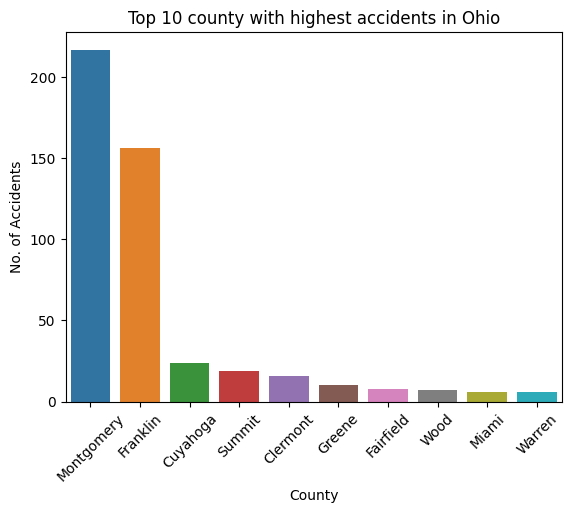

In [ ]:
# top 10 counties with accidents
# since this is just a sample of data, this data have accidents only from OHIO. So I will find top 10 county instead of State
df1 = df.groupby('County')['ID'].count().sort_values(ascending = False).reset_index()
df1.columns = ['County', 'count']
sns.barplot(df1.iloc[:10], x = 'County', y = 'count')
plt.xticks(rotation = 45)
plt.ylabel('No. of Accidents')
plt.title('Top 10 county with highest accidents in Ohio')

<Axes: xlabel='Start_Lat', ylabel='Start_Lng'>

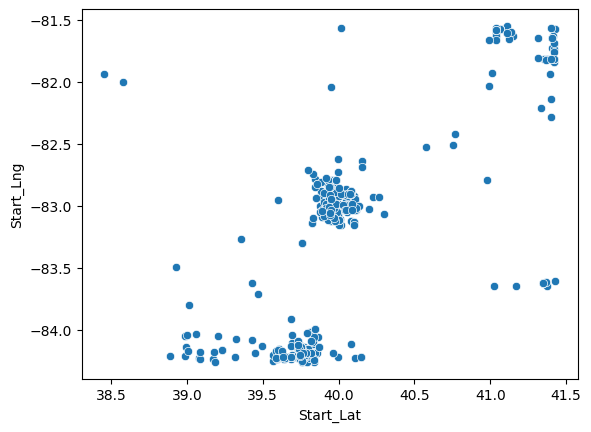

In [ ]:
sns.scatterplot(df, x = 'Start_Lat', y = 'Start_Lng')

Text(0.5, 0, 'Accident no.')

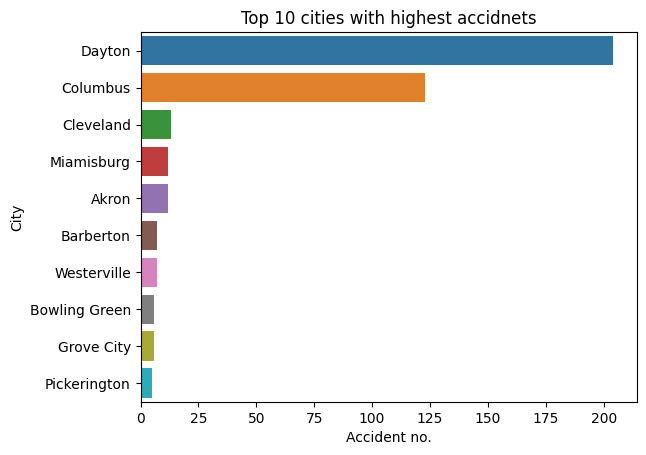

In [ ]:
df2 = df.groupby('City')['ID'].count().sort_values(ascending = False).reset_index()
df2.columns = ['City', 'count']
sns.barplot(df2[:10], x = 'count', y = 'City')
plt.title('Top 10 cities with highest accidnets')
plt.xlabel('Accident no.')


<ipython-input-85-6ff9d8d017ee>:4: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



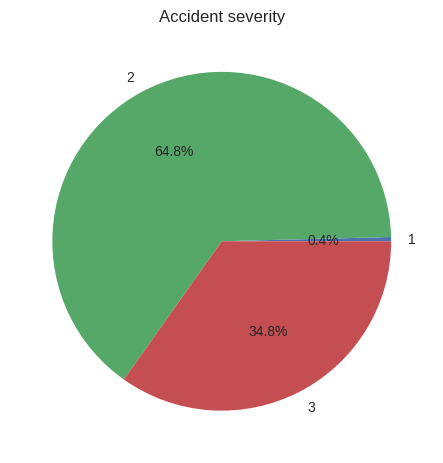

   Severity  count
0         1      2
1         2    324
2         3    174


In [ ]:
df3 = df.groupby('Severity')['ID'].count().reset_index()
df3.columns = ['Severity', 'count']

plt.style.use('seaborn')
plt.pie(df3['count'], labels = df3['Severity'], autopct='%1.1f%%')
plt.title('Accident severity')
plt.show()
print(df3)

In [ ]:
# accidenst with time
import datetime as dt
dats = []
for x in df['Start_Time']:
  y = dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date()
  dats.append(y)
df['Start_Time'] = dats

(array([16840., 16844., 16848., 16852., 16856., 16860., 16861., 16865.]),
 [Text(16840.0, 0, '2016-02-09'),
  Text(16844.0, 0, '2016-02-13'),
  Text(16848.0, 0, '2016-02-17'),
  Text(16852.0, 0, '2016-02-21'),
  Text(16856.0, 0, '2016-02-25'),
  Text(16860.0, 0, '2016-02-29'),
  Text(16861.0, 0, '2016-03-01'),
  Text(16865.0, 0, '2016-03-05')])

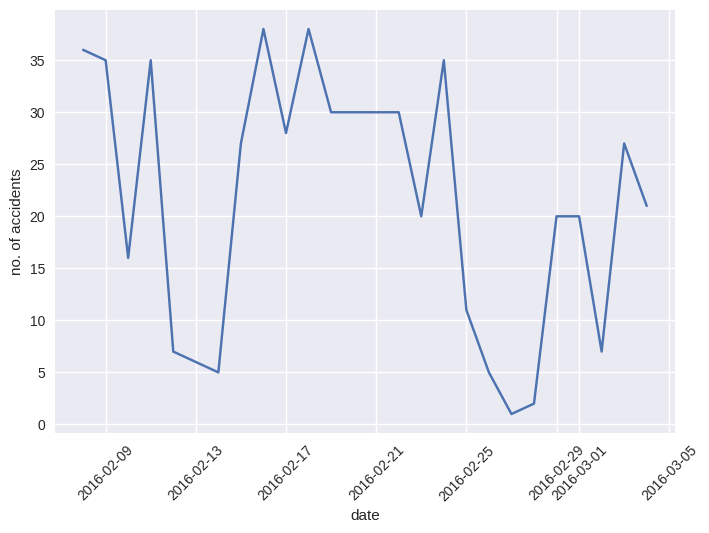

In [ ]:
df3 = df.groupby('Start_Time')['ID'].count().reset_index()
df3.columns = ['date', 'no. of accidents']
sns.lineplot(df3, x = 'date', y = 'no. of accidents')
plt.xticks(rotation = 45)


## **Activity 3:**

### **Dataset Information:**

For this activity, we will use the "Titanic: Machine Learning from Disaster" dataset, which contains information about passengers on the Titanic, including their age, gender, class, fare, and survival status.

### **Data Visualization Task:**

Your task is to create a data visualization using Seaborn to explore the relationship between age, gender, and survival status of the passengers on the Titanic. Perform the following actions based on the data:

1. Identify missing values: Check for any missing values in the Age column.

2. Fill in missing values: If there are missing values in the Age column, use appropriate techniques such as imputation or interpolation to fill in the missing values.

3. Inconsistent formats: Check if there are any inconsistencies in the formatting of the gender column. For example, if the gender is encoded as "male" and "female", ensure that it is consistent throughout the dataset.

4. Standardize data types: Convert the data type of the Age column to numeric (float or integer) if necessary.

5. Identify and handle outliers or inconsistencies: Use Seaborn to create visualizations such as box plots or scatter plots to identify any outliers or inconsistencies in the data related to age, gender, and survival status.

6. Create data visualizations: Use Seaborn to create appropriate visualizations such as bar charts, count plots, or heatmaps to explore the relationship between age, gender, and survival status of the passengers on the Titanic.

7. Interpretation: Based on the visualizations, draw conclusions and insights about the relationship between age, gender, and survival status of the passengers on the Titanic.

**Note:** You can use Seaborn functions such as countplot(), barplot(), boxplot(), scatterplot(), heatmap(), etc. to create the visualizations. Use appropriate Seaborn styling options such as color palettes, font sizes, and plot styles to make the visualizations visually appealing and informative.

Remember to provide proper labels and titles for the visualizations, and include necessary comments or explanations in your code to explain your thought process and interpretation of the results.

**You need to use sns.load_dataset() to load the dataset here.**

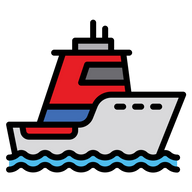

In [ ]:
# Write your code here
import seaborn as sns
df = sns.load_dataset('titanic')
print(df.info(),"\n\n")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None 




,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# deck column is missing more than 75% of values. So it will be droped
df.drop('deck', inplace = True, axis = 1)

In [ ]:
# we will fill the age by using alone column. We might expect that people who were alone might have higher age (we can asume atleast middle aged or young adult or old mens)
# also columns have not any missing values.
df1 = df.groupby('alone')['age'].mean()
df1

alone
False    26.413452
True     32.220297
Name: age, dtype: float64

In [ ]:
df['age'] = df['age'].fillna(df.apply(lambda x: 32.22 if pd.isnull(x['age']) and x['alone'] == False else
                                       26.41 if pd.isnull(x['age']) and x['alone'] == True else x['age'], axis=1))

In [ ]:
# here embarked & embarked_town columns are same we will drop embarked column
df.drop('embarked', axis = 1, inplace = True)

In [ ]:
df.groupby('embark_town')['sex'].count()

embark_town
Cherbourg      168
Queenstown      77
Southampton    644
Name: sex, dtype: int64

In [ ]:
# it seems that most people are form Southampton. Thus we wiill fill 3 missing values in this columns as Southampton
df['embark_town'].fillna('Southampton', inplace = True )

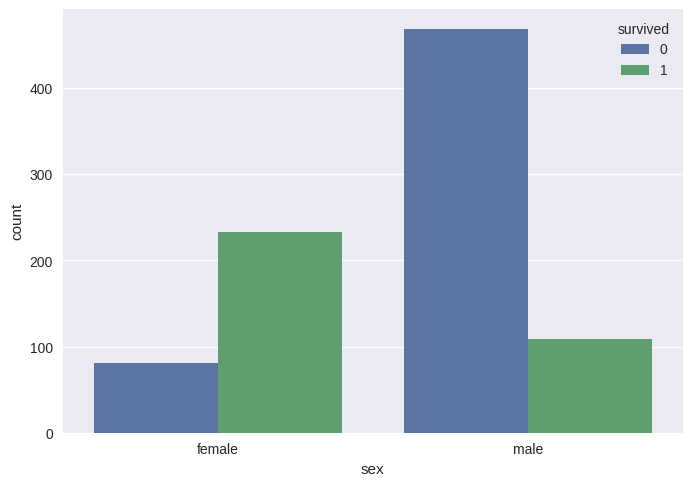

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df1 = df.groupby(['sex', 'survived'])['who'].count().reset_index()
df1.columns = ['sex', 'survived', 'count']

sns.barplot(df1, x = 'sex', y = 'count', hue = 'survived')
plt.show()
# insights from graph below
# it seems that more woman are survived than men. This is very obvious difference
# We can assume that men have given preference to women and children to escape

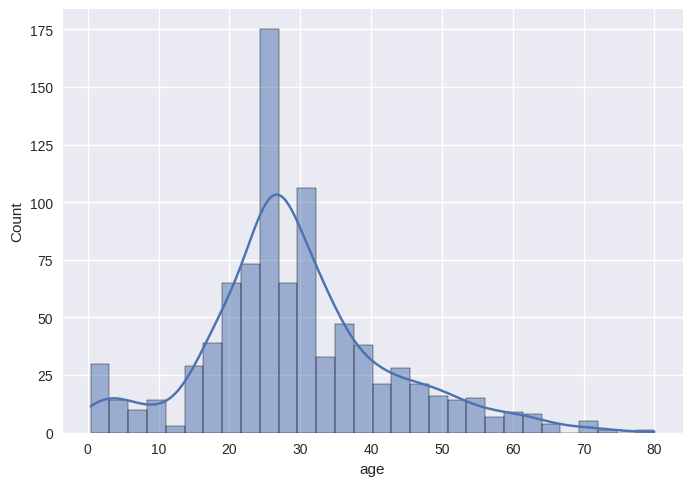

In [ ]:
# age dist on ship
sns.histplot(df, x = 'age', kde = True)
plt.show()
# insights from graph below
# certainly most of the peole belong to age group 20-40, in that we have max people are from age group 26-28

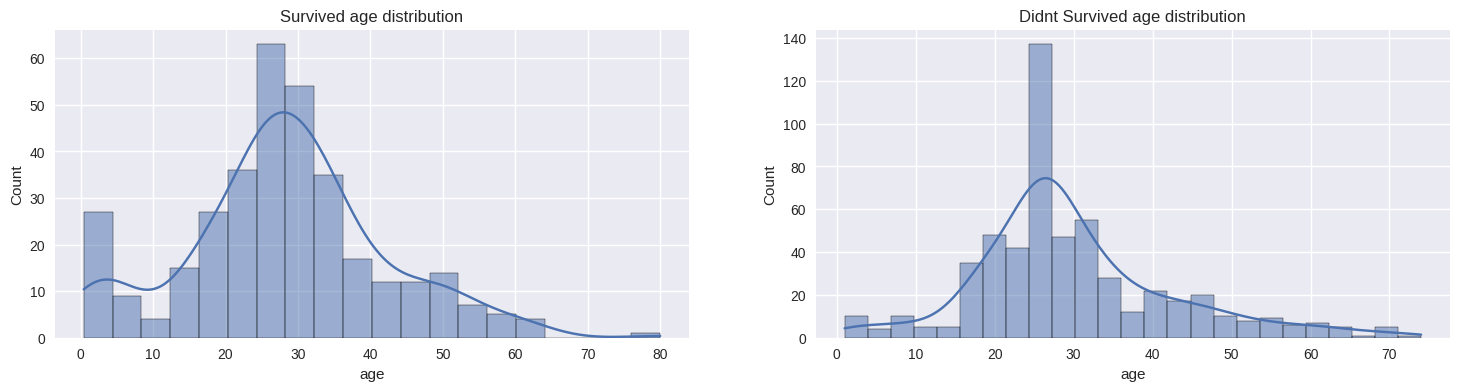

In [ ]:
# age vs survival
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

sns.histplot(df[df.survived == 1], x = 'age', kde = True, ax = ax[0])
ax[0].set_title('Survived age distribution')

sns.histplot(df[df.survived == 0], x = 'age', kde = True, ax = ax[1])
ax[1].set_title('Didnt Survived age distribution')

plt.show()
# insights from graph below
# There are more people who didnt survired but in both age distribution is same.
# but in survival we see a greater curve in age 0-10 We can assume that people gave preference to escape.

<Axes: xlabel='class', ylabel='count'>

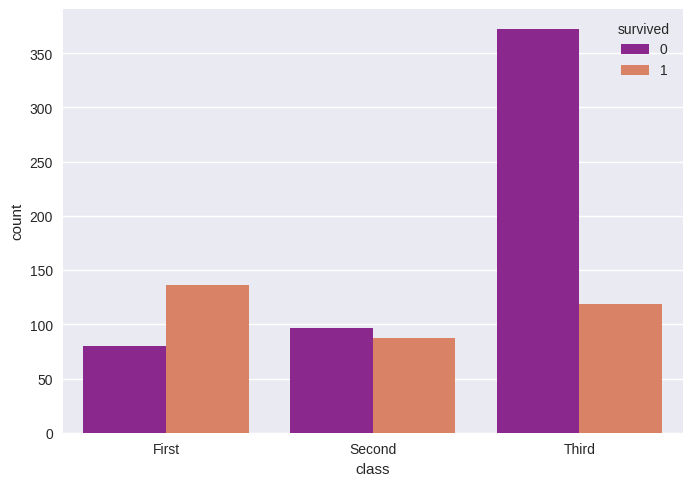

In [ ]:
df3 = df.groupby(['class', 'survived'])['age'].count().reset_index()
df3.columns = ['class', 'survived', 'count']

sns.barplot(df3, x = 'class', y = 'count', hue = 'survived', palette = 'plasma')
# insights from graph below
# being from 1st class was safest
# here people from 3rd class who died are most in number. We can assume that these people were close to impact spot of ice berg
# 3rd class rooms / resting places are below 2nd and 1st class & close to ships hull

<Axes: xlabel='town', ylabel='count'>

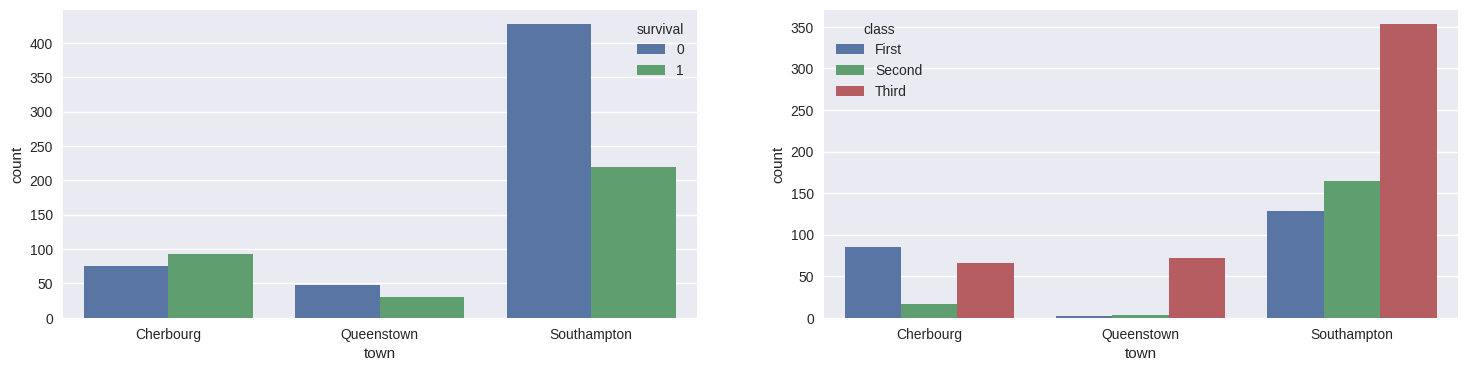

In [ ]:
# Embarkation vs Survivl
df4 = df.groupby(['embark_town', 'survived'])['age'].count().reset_index()
df4.columns = ['town', 'survival', 'count']

fig, ax = plt.subplots(1, 2, figsize=(18, 4))
sns.barplot(df4, x= 'town', y = 'count', hue = 'survival', ax = ax[0])

df5 = df.groupby(['embark_town', 'class'])['age'].count().reset_index()
df5.columns = ['town', 'class', 'count']
sns.barplot(df5, x = 'town', y = 'count', hue = 'class', ax = ax[1])
# insights from graph below
# here most people dead were from Southampton apprx 67% of the southampton embarked people died.
# Likewise from every town people died from third class are more

## **Activity 4:**

### **Iris Species:**


👉 Instructions:
1. You have a dataset containing information about various iris flowers, including sepal length, sepal width, petal length, petal width, and species. Your task is to use the Seaborn library in Python to create visualizations and gain insights from the data.

2. Load the dataset: Load the "Iris Species" dataset using Seaborn's built-in function load_dataset().

3. Explore the data: Use Seaborn's functions such as head(), info(), and describe() to explore the dataset and understand its structure, contents, and data types.

4. Data visualization: Create various visualizations using Seaborn's functions such as scatterplot(), boxplot(), violinplot(), pairplot(), heatmap(), etc. to visualize the relationships between different variables and gain insights from the data. Experiment with different types of visualizations to explore different aspects of the data.

5. Customizations: Customize your visualizations using Seaborn's built-in functions for changing colors, styles, labels, titles, etc. to make your visualizations more informative and visually appealing.

6. Interpretation: Based on the visualizations, analyze and interpret the patterns, trends, and relationships in the data. Draw conclusions and insights from the visualizations and present your findings in a clear and concise manner.

**Note:** Make sure to use appropriate Seaborn functions for each type of visualization and follow best practices for data visualization, including labeling axes, adding titles, using appropriate colors, and choosing the right type of plot for your data.

**You need to use sns.load_dataset() to load the dataset here.**

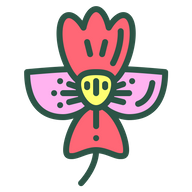

In [ ]:
# Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.0, 'sepal width vs petal width')

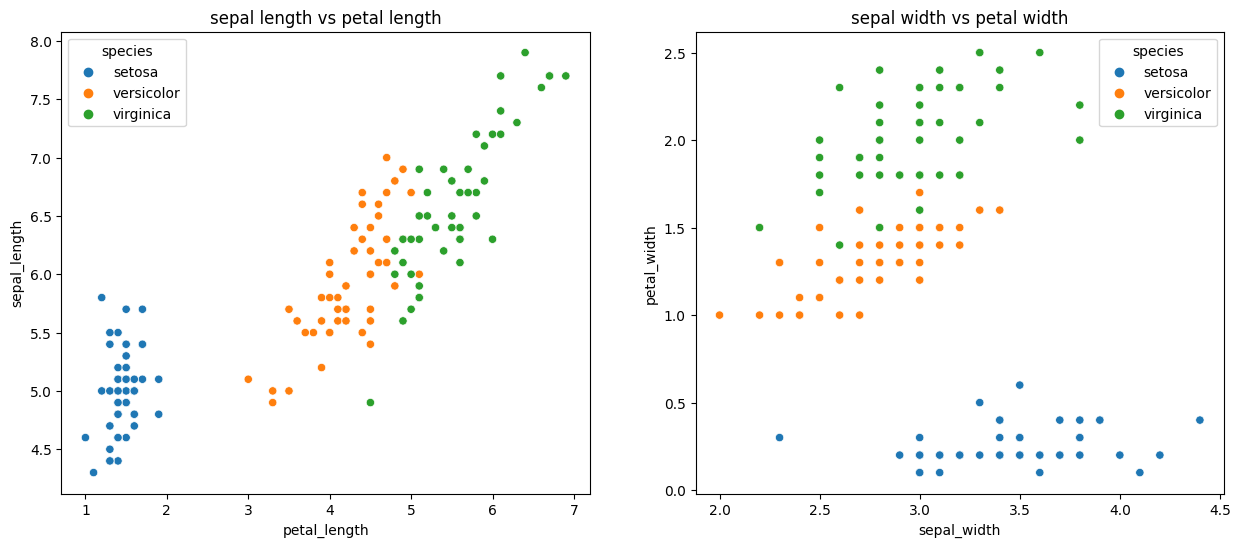

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15, 6))
sns.scatterplot(df, y = 'sepal_length', x = 'petal_length', hue = 'species', ax = ax[0])
sns.scatterplot(df, x = 'sepal_width', y = 'petal_width', hue = 'species', ax = ax[1])
ax[0].set_title('sepal length vs petal length')
ax[1].set_title('sepal width vs petal width')

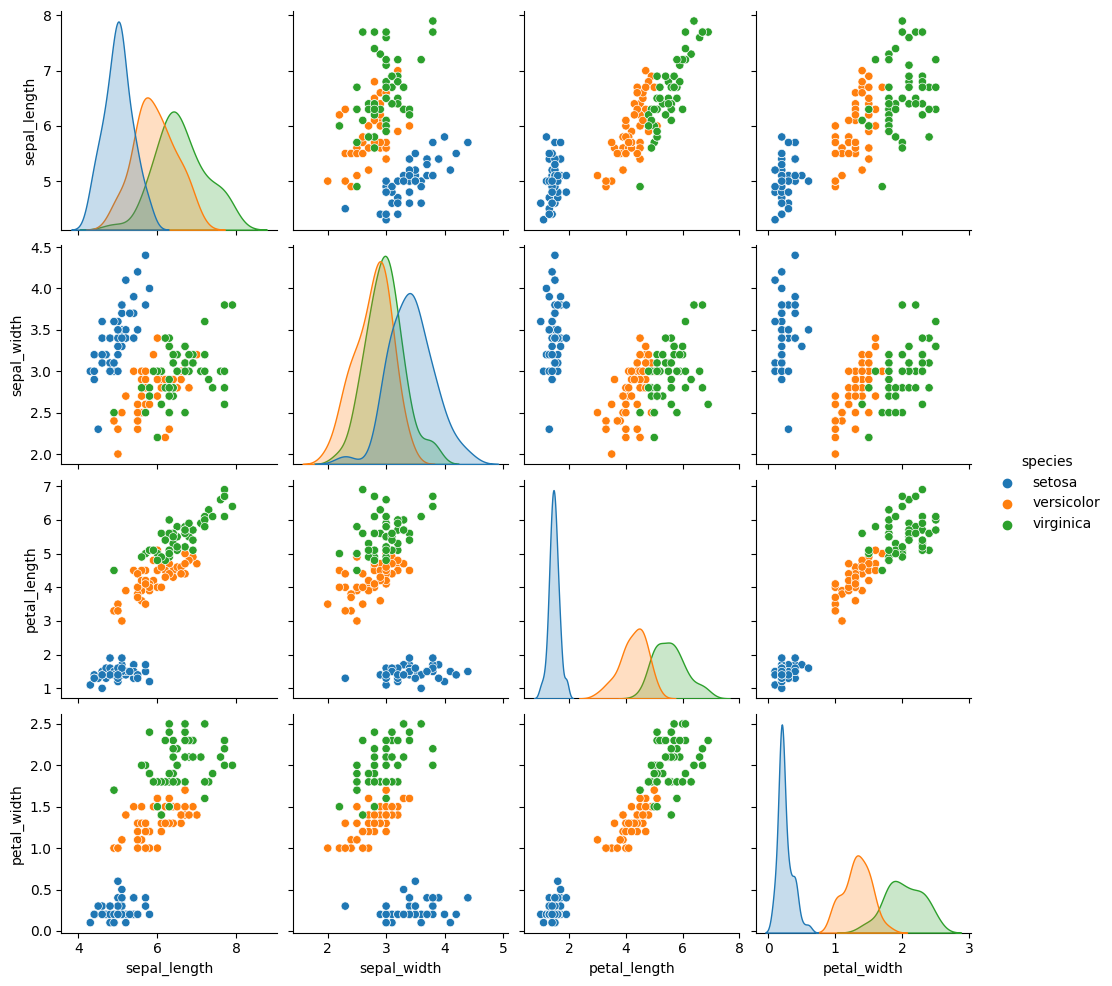

In [ ]:
sns.pairplot(df, hue = 'species')

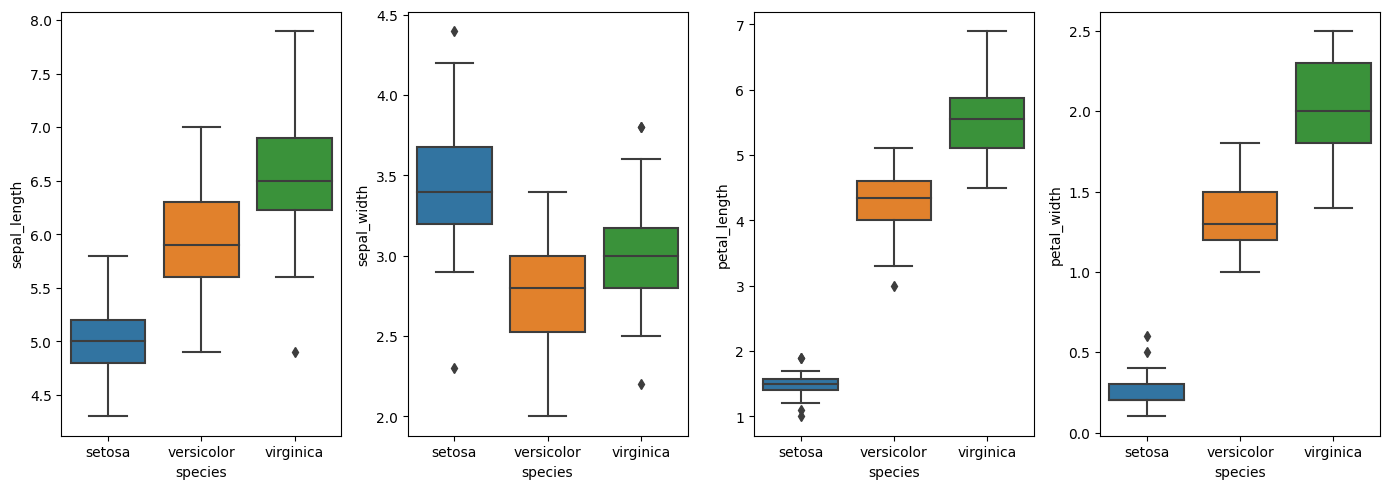

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (14, 5))
vars = df.columns[:-1]
for z, col in enumerate(vars):
  sns.boxplot(df,x = 'species', y = col, ax = ax[z])
plt.tight_layout()

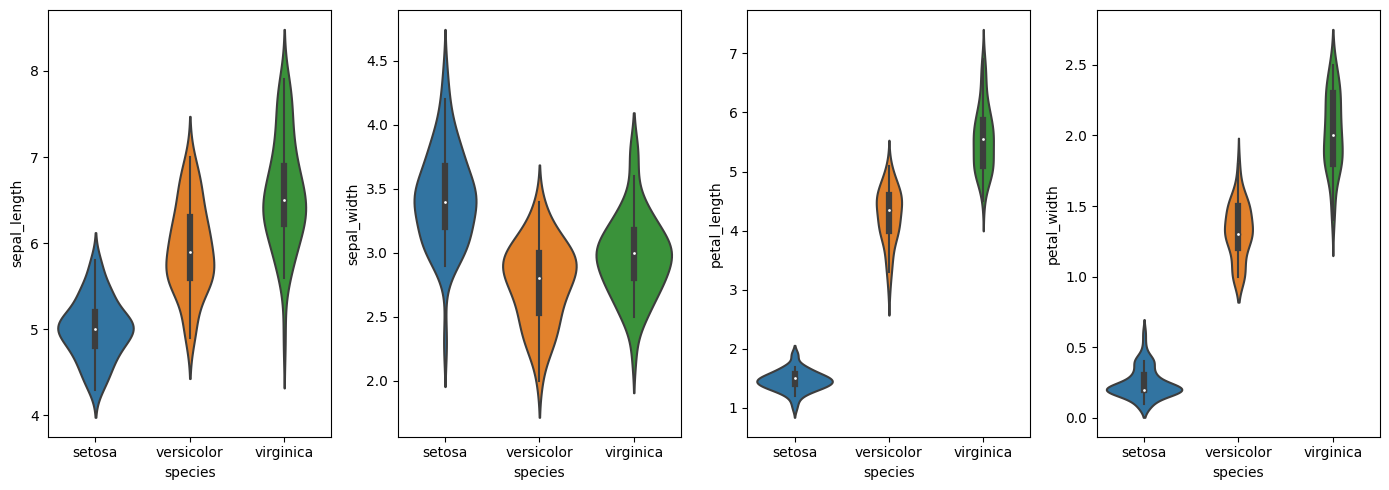

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (14, 5))
vars = df.columns[:-1]
for z, col in enumerate(vars):
  sns.violinplot(df, x = 'species', y = col, ax = ax[z])
plt.tight_layout()

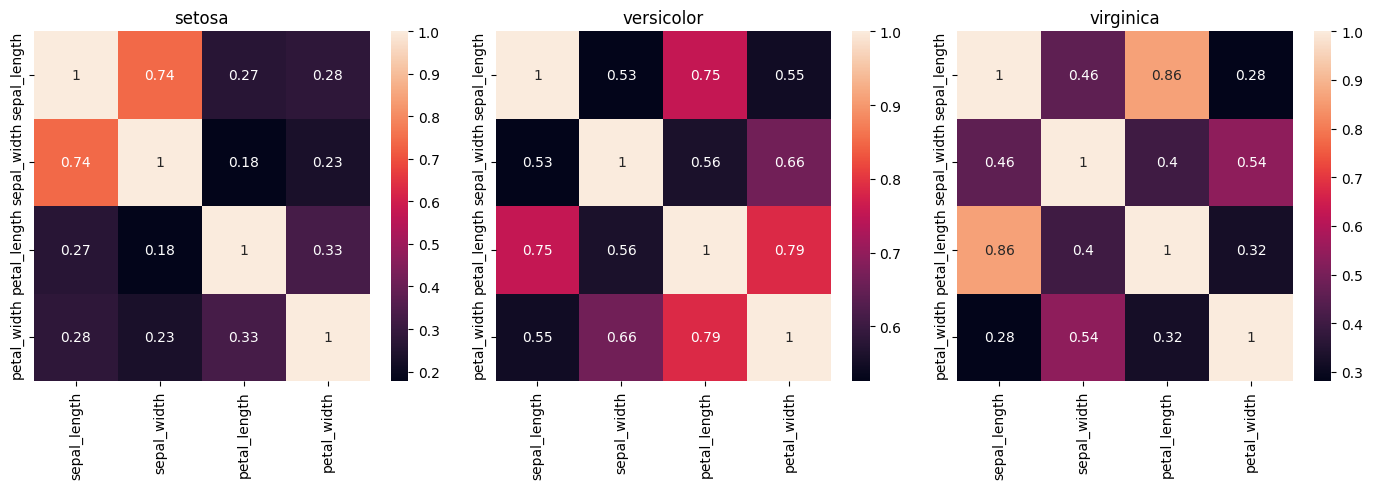

In [ ]:
df1 = df.iloc[:,:-1]
species = ['setosa', 'versicolor', 'virginica']
fig, ax = plt.subplots(1, 3, figsize = (14, 5))
for z, col in enumerate(species):
  sns.heatmap(df1[df.species == col].corr(method = 'pearson'), ax = ax[z], annot = True)
  ax[z].set_title(col)
plt.tight_layout()

# ***CONCLUSION***
***- From pair scatter plot***
1. 'setosa' species have **smaller** petal length & sepal length compared to other species.& Also **thicker** sepals & **thinner** petals compared ro other species.
2. 'virginica' species have longer petal length & sepal length compared to other species.& Also almost same petals & sepal compared to versicolor.
3. 'versicolor' species have middle values of petal-sepal length & petal-sepal width.
4. Diagonal plots are kde plots for each variable. sepal length-width kde plots are overlapping eachother imlpying that these variables have common values in some entries. Also for petal legnth-width setosa remains untouched by other kde plots; implying that virginica & versicolor have some common entries but their values are far from setosa.
5. from point 4 ==> Thus virgina & versicolor have longer & thicker petals compared to setosa. There might confusion arise to determine the species between virgina & versicolor

- ***Box plot & violin plot insights***
1. Species Setosa has the smallest features and less distributed with some outliers.
2. Species Versicolor has the average features.
3. Species Virginica has the highest features

- ***Correlation heatmap is not giving any useful information here***